<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab2_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from PIL import Image
from pylab import *

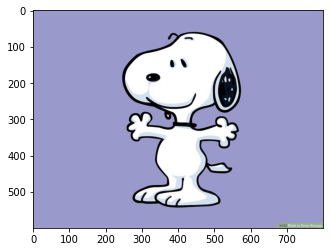

In [8]:
image1 = np.array(Image.open('/first.jpg'), dtype=int)
figure()
imshow(image1)
show()

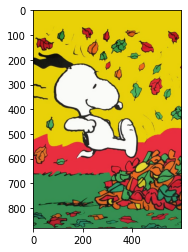

In [9]:
image2 = np.array(Image.open('/second.jpg'), dtype=int)
figure()
imshow(image2)
show()

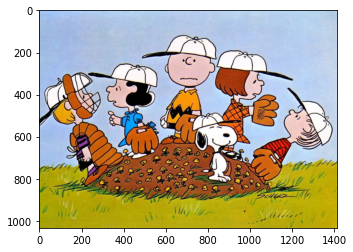

In [10]:
image3 = np.array(Image.open('/third.jpg'), dtype=int)
figure()
imshow(image3)
show()


# Сегментация с помощью бинаризация полутонового изображения методом Оцу
https://habr.com/ru/post/112079/

Переводим изображение в получтоновое

In [11]:
def make_halftone_image(image):
  width = image.shape[0]
  height = image.shape[1]

  halftoneImage = np.zeros(width*height, dtype=int)
  halftoneImage.shape = (width, height)
  for i in range(width):
      for j in range(height):
          halftoneImage[i][j] = mean(image[i,j,:])
  
  return halftoneImage

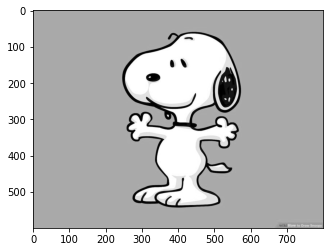

In [12]:
halftoneImage1 = make_halftone_image(image1)
figure()
imshow(halftoneImage1, cmap='gray', vmin=0, vmax=255)
show()

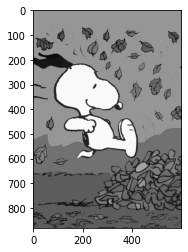

In [13]:
halftoneImage2 = make_halftone_image(image2)
figure()
imshow(halftoneImage2, cmap='gray', vmin=0, vmax=255)
show()

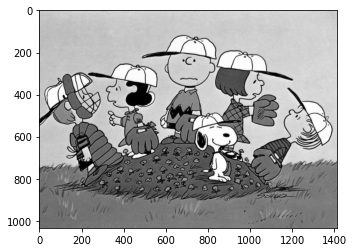

In [14]:
halftoneImage3 = make_halftone_image(image3)
figure()
imshow(halftoneImage3, cmap='gray', vmin=0, vmax=255)
show()

Находим гистограмму изображения

In [15]:
def draw_histogram(image):
  x = np.array(range(0, 256), dtype=int)
  y = np.zeros(256, dtype=int)
  width = image.shape[0]
  height = image.shape[1]

  for i in range(0, width):
    for j in range(0, height):
      y[image[i, j]] += 1

  return x, y

<BarContainer object of 256 artists>

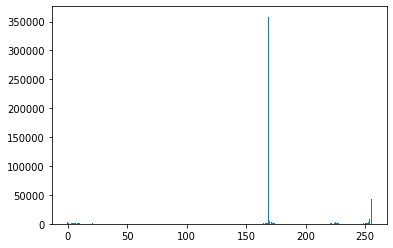

In [16]:
x1, y1 = draw_histogram(halftoneImage1)
figure()
bar(x1,y1)

<BarContainer object of 256 artists>

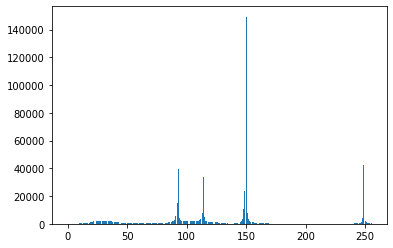

In [17]:
x2, y2 = draw_histogram(halftoneImage2)
figure()
bar(x2,y2)

<BarContainer object of 256 artists>

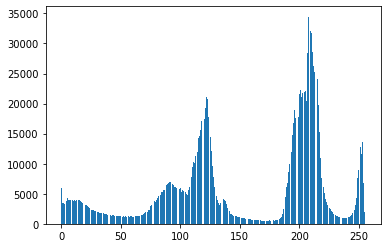

In [18]:
x3, y3 = draw_histogram(halftoneImage3)
figure()
bar(x3,y3)

Реализаем бинаризацию полутоновога изображения методом Оцу

In [19]:
def otsu_Threshold(hist):
  min = hist[0];
  max = hist[0];
 
  for i in range(1, hist.size):
    value = hist[i];
    if value < min:
      min = i
    if value > max:
      max = i

  # Введем два вспомогательных числа:
  m = 0; # m - сумма высот всех бинов, домноженных на положение их середины
  n = 0; # n - сумма высот всех бинов
  for t in range(0, max - min + 1):
    m += t * hist[t]
    n += hist[t]
 
  maxSigma = -1; # Максимальное значение межклассовой дисперсии
  threshold = 0; # Порог, соответствующий maxSigma
 
  alpha1 = 0; # Сумма высот всех бинов для класса 1
  beta1 = 0; # Сумма высот всех бинов для класса 1, домноженных на положение их середины
 
  # Переменная alpha2 не нужна, т.к. она равна m - alpha1
  # Переменная beta2 не нужна, т.к. она равна n - alpha1
 
  # t пробегается по всем возможным значениям порога
  for t in range(0, max - min + 1):
    alpha1 += t * hist[t]
    beta1 += hist[t]
 
    # Считаем вероятность класса 1.
    w1 = beta1 / n
    # w2 тоже не нужна, т.к. она равна 1 - w1
 
    # a = a1 - a2, где a1, a2 - средние арифметические для классов 1 и 2
    a = (alpha1 / beta1) - ((m - alpha1) / (n - beta1))
    
    # Наконец, считаем sigma
    sigma = w1 * (1 - w1) * (a**2)
 
    # Если sigma больше текущей максимальной, то обновляем maxSigma и порог
    if sigma > maxSigma:
      maxSigma = sigma
      threshold = t

   # Не забудем, что порог отсчитывался от min, а не от нуля
  threshold += min;
 
  return threshold

95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

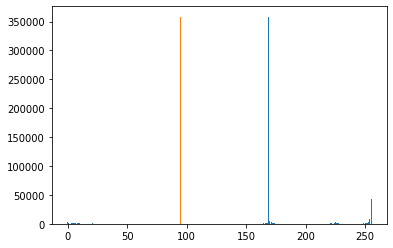

In [20]:
threshold1 = otsu_Threshold(y1)
print(threshold1)
figure()
bar(x1,y1)
bar(threshold1, np.amax(y1))


126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

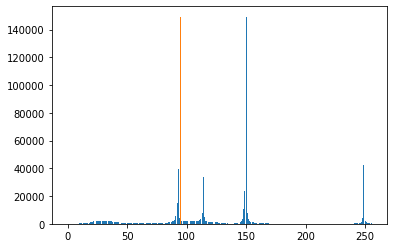

In [21]:
threshold2 = otsu_Threshold(y2)
print(threshold2)
figure()
bar(x2,y2)
bar(threshold1, np.amax(y2))

151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


<BarContainer object of 1 artists>

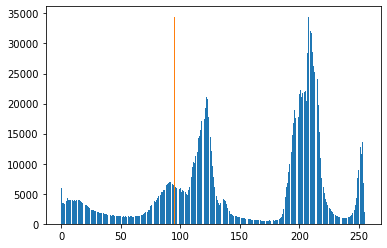

In [22]:
threshold3 = otsu_Threshold(y3)
print(threshold3)
figure()
bar(x3,y3)
bar(threshold1, np.amax(y3))

Получим бинарное изображение

In [23]:
def otsu_Binarization(image, threshold):
  width = image.shape[0]
  height = image.shape[1]
  
  newImage = np.zeros(width*height, dtype=int)
  newImage.shape = (width, height)
  
  for x in range(0, width):
    for y in range(0, height):
      if image[x, y] > threshold:
        newImage[x, y] = 255
        
  return newImage

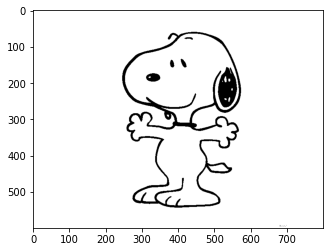

In [24]:
binaryImage1 = otsu_Binarization(halftoneImage1, threshold1)
figure()
imshow(binaryImage1, cmap='gray', vmin=0, vmax=255)
show()

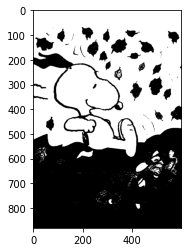

In [25]:
binaryImage2 = otsu_Binarization(halftoneImage2, threshold2)
figure()
imshow(binaryImage2, cmap='gray', vmin=0, vmax=255)
show()

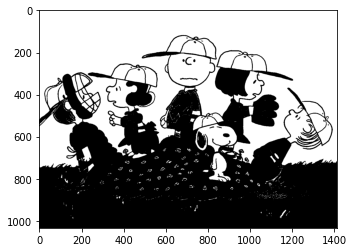

In [26]:
binaryImage3 = otsu_Binarization(halftoneImage3, threshold3)
figure()
imshow(binaryImage3, cmap='gray', vmin=0, vmax=255)
show()

Удалим шумы типа «соль и перец»

In [27]:
def solt_and_pepper_filtering(image):
  width = image.shape[0]
  height = image.shape[1]

  newImage = image.copy()

  imageCopy = np.zeros((width+1)*(height+1), dtype=int)
  imageCopy.shape = ((width+1),(height+1))

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  for i in range(1, width-1):
      for j in range(1, height-1):
        sum = np.sum(imageCopy[i-1:i+2, j-1:j+2]) - imageCopy[i,j]
        if sum == 8:
          newImage[i,j] = 1
        elif sum == 0:
          newImage[i,j] = 0

  for i in [0, width-1]:
    for j in [0, height-1]:
      sum = np.sum(imageCopy[i-1:i+2, j-1:j+2]) - imageCopy[i,j]
      if sum == 3:
        newImage[i,j] = 1
      elif sum == 0:
        newImage[i,j] = 0

  for i in range(1, width-1):
    for j in [0, height-1]:
      sum = np.sum(imageCopy[i-1:i+2, j-1:j+2]) - imageCopy[i,j]
      if sum == 5:
        newImage[i,j] = 1
      elif sum == 0:
        newImage[i,j] = 0

  for i in [0, width-1]:
    for j in range(1, height-1):
      sum = np.sum(imageCopy[i-1:i+2, j-1:j+2]) - imageCopy[i,j]
      if sum == 5:
        newImage[i,j] = 1
      elif sum == 0:
        newImage[i,j] = 0
    
  return newImage 

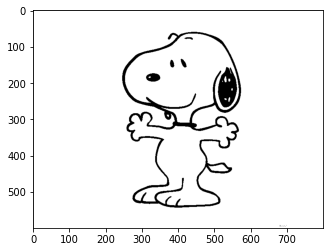

In [28]:
cleanImage1 = solt_and_pepper_filtering(binaryImage1)
figure()
imshow(cleanImage1, cmap='gray', vmin=0, vmax=255)

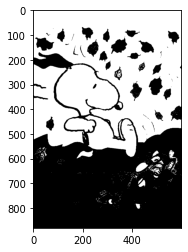

In [29]:
cleanImage2 = solt_and_pepper_filtering(binaryImage2)
figure()
imshow(cleanImage2, cmap='gray', vmin=0, vmax=255)

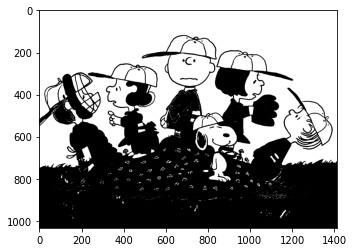

In [30]:
cleanImage3 = solt_and_pepper_filtering(binaryImage3)
figure()
imshow(cleanImage3, cmap='gray', vmin=0, vmax=255)